In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()
# here, Sequential() create pipeline

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# 32 = no of kernal and (3, 3) = each kernal size 
# input shape is decleare at first where entire convolution or network is start after that there is no need to decleare it.
# we can change no of kernal and its size

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer

classifier.add(Conv2D(20, (5, 5), activation = 'relu'))
               
classifier.add(Conv2D(20, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))
# sigmoid is used for binary class classification, for multi class we use softmax

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:\Documents\Downloads/car_bike',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/Documents/Downloads/car_bike',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)


Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


c:\users\admin\anaconda3\envs\tf_2.4\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


8000/8000 [==============================] - 8s 33us/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6097 - val_accuracy: 0.5000


In [2]:
classifier.save("car_bike.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
# Part 3 - Making new predictions
from keras.models import load_model
model = load_model('car_bike.h5')
import numpy as np
from keras.preprocessing import image
img_bike = image.load_img('D:/Documents/Downloads/car_bike/bike/bike.jpg', target_size = (64, 64))
img_car = image.load_img('D:/Documents/Downloads/car_bike/car/car.jpg', target_size = (64, 64))
test_image = image.img_to_array(img_bike)
test_image1 = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image1)
training_set.class_indices


{'bike': 0, 'car': 1}

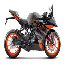

In [15]:
img_bike

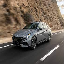

In [16]:
img_car

In [17]:
if result[0][0] == 0:
    prediction = 'bike'
    print(prediction)
else:
    prediction = 'car'
    print(prediction)


bike


In [18]:
if result[0][0] == 1:
    prediction = 'bike'
    print(prediction)
else:
    prediction = 'car'
    print(prediction)

car
